In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [5]:
# @title Loading Dataset
df=pd.read_csv("/content/Cardiotocographic.csv") #loading dataset

In [6]:
df

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [7]:
df.info() #check datatypes of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [8]:
df.shape #checking no of rows and columns

(2126, 14)

In [9]:
df.isnull().sum() #check no null values in each columns
#as we saw LB has 21, AC has 20 ,DS=21,DP=21,MLTV=21,WIDTH=21,TENDANCY=21,NSP=21 null values

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [10]:
for i in df.isna().sum():  #checking percentage of null values
  print(i*100/len(df))

0.9877704609595485
0.940733772342427
0.0
0.0
0.0
0.9877704609595485
0.9877704609595485
0.0
0.0
0.0
0.9877704609595485
0.9877704609595485
0.9877704609595485
0.9877704609595485


In [11]:
#as per standard practices for treating null values we follow
#0-5% drop rows
#6-45% replace missing values
#50 above we drop columns

In [12]:
#as it is less than %5 we drop rows

<Axes: >

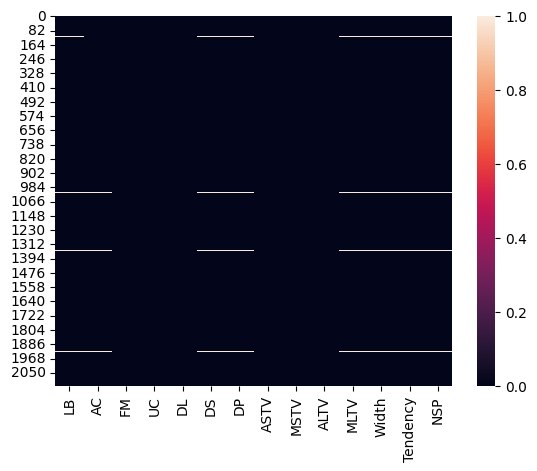

In [13]:
#lets visualize null values using heatmap
sns.heatmap(df.isna())

In [14]:
#so we will drop rows with null values
df.dropna(inplace=True)

In [15]:
df

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [16]:
df.reset_index() #we reset the index

,index,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2100,2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2101,2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2102,2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2103,2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [17]:
# @title Checking and Treating Outliers


In [18]:
#lets check for outlier firstly through statistics
df.describe()  #looking as 75% and max value we can take hint of present of outliers

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,133.343598,0.003202,0.009963,0.004388,0.001892,0.000003,0.000175,46.996929,1.361006,10.353647,8.284887,70.429260,0.316371,1.304507
std,11.270154,0.004324,0.067870,0.003350,0.003348,0.000142,0.000840,18.847737,1.173164,21.282102,7.772858,42.931822,0.645622,0.644619
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001838,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001631,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000,67.000000,0.000000,1.000000
75%,140.000000,0.005650,0.002554,0.006536,0.003289,0.000000,0.000000,61.000000,1.700000,11.000000,10.900000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


array([[<Axes: title={'center': 'LB'}>, <Axes: title={'center': 'AC'}>,
        <Axes: title={'center': 'FM'}>, <Axes: title={'center': 'UC'}>],
       [<Axes: title={'center': 'DL'}>, <Axes: title={'center': 'DS'}>,
        <Axes: title={'center': 'DP'}>, <Axes: title={'center': 'ASTV'}>],
       [<Axes: title={'center': 'MSTV'}>,
        <Axes: title={'center': 'ALTV'}>,
        <Axes: title={'center': 'MLTV'}>,
        <Axes: title={'center': 'Width'}>],
       [<Axes: title={'center': 'Tendency'}>,
        <Axes: title={'center': 'NSP'}>, <Axes: >, <Axes: >]],
      dtype=object)

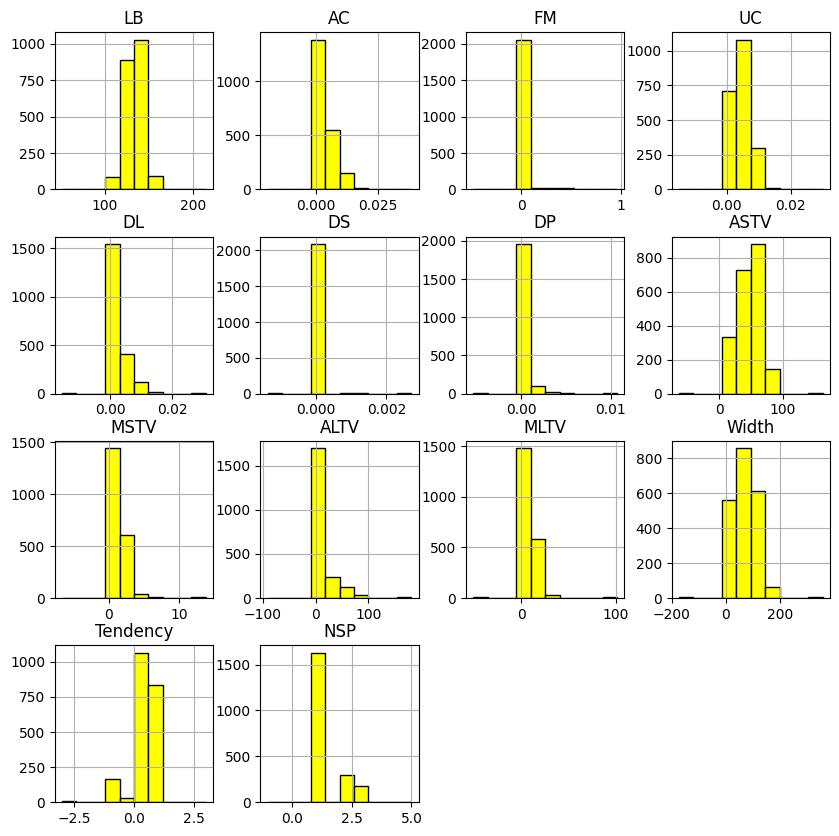

In [19]:
df.hist(figsize=(10,10),facecolor='yellow',edgecolor='black',bins=10) #looking for skewness in distribution of data

<Axes: >

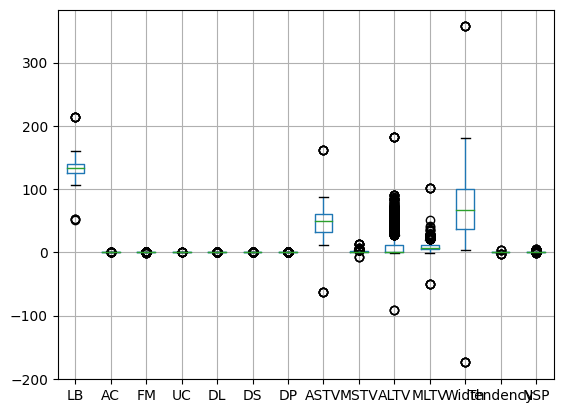

In [20]:
#now to get more clear views of outliers in data we are using boxplot
df.boxplot()

In [21]:
# NOW LETS CREATE FUNCTION TO CALCULATE UPPER EXTREME AND LOWER EXTREME FOR OUTLIER DETECTION
def outlier_detection(data,colname):
  q1=data[colname].quantile(0.25)
  q3=data[colname].quantile(0.75)
  iqr=q3-q1
  lower_extreme=q1-(1.5*iqr)
  upper_extreme=q3+(1.5*iqr)
  return lower_extreme,upper_extreme

In [22]:
outlier_detection(df,'LB')

(105.0, 161.0)

<Axes: >

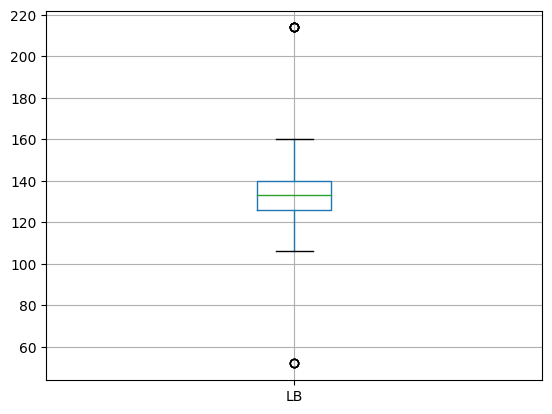

In [23]:
df.boxplot('LB') #it has outlier on both upper end and lower end

In [24]:
df[df['LB']>161.0] #upper outliers in lb

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
411,214.0,0.000000,0.000000,0.001595,0.001595,0.000000,0.0,71.000000,0.300000,17.0,5.8,15.0,0.0,2.0000
610,214.0,0.002469,0.002469,0.002469,0.000000,0.000004,0.0,35.000000,1.798149,0.0,24.7,118.0,1.0,1.0000
612,214.0,0.005181,0.012953,0.002591,0.000000,0.000000,0.0,39.442226,1.600000,0.0,10.0,136.0,0.0,0.9912
1103,214.0,0.006972,0.000000,0.002960,0.000000,0.000000,0.0,19.000000,2.300000,0.0,12.1,53.0,0.0,1.0000
1406,214.0,0.005068,0.000000,0.001689,0.000000,0.000000,0.0,46.000000,0.800000,0.0,8.6,67.0,1.0,1.0000
1504,214.0,0.006189,0.000000,0.006189,0.000000,0.000000,0.0,38.000000,1.000000,0.0,8.1,53.0,0.0,1.0000


In [25]:
df.loc[df['LB']>160.0,'LB']=160.0 #replacing upper outliers with 160

In [26]:
df[df['LB']>161.0] #no outliers shown now

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP


In [27]:
df[df['LB']<105.0] #lower outliers in LB

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
134,52.000000,0.001590,0.000000,0.029851,0.000000,0.000000,0.000003,58.0,0.5,0.0,7.9,44.00000,1.0,1.0
785,52.000000,0.000834,0.013344,0.000000,0.000000,0.000000,0.000000,53.0,0.7,8.0,12.0,77.00000,1.0,1.0
1027,51.842487,0.009485,0.000000,0.005420,0.002710,0.000005,0.000000,-63.0,2.5,0.0,3.9,98.00000,0.0,1.0
1834,52.188547,0.000000,0.001043,0.003128,0.007299,0.000000,0.000000,61.0,1.4,0.0,10.0,105.40169,1.0,1.0


In [28]:
df.loc[df['LB']<105.0,'LB']=105.0 #replacing lower outlier with lower extreme

In [29]:
#repating same for all columns with outliers

In [30]:
outlier_detection(df,'AC')

(-0.008474577, 0.014124295)

<Axes: >

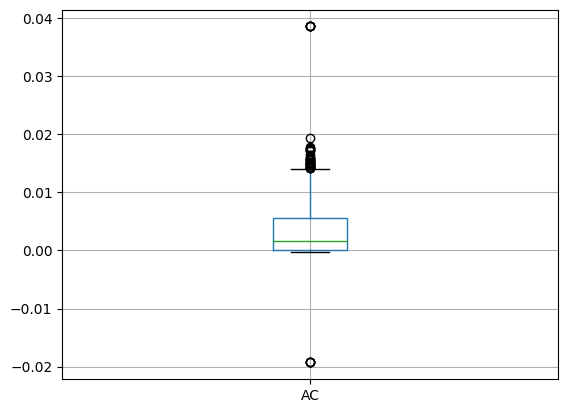

In [31]:
df.boxplot('AC')

In [32]:
df[df['AC']>0.014124295].shape

(35, 14)

In [33]:
df.loc[df['AC']>0.14124295,'AC']=0.14124295
df.loc[df['AC']<-0.008474577,'AC']=-0.008474577

<Axes: xlabel='FM'>

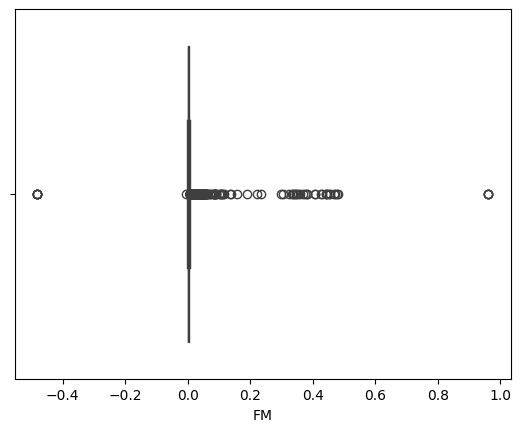

In [34]:
sns.boxplot(x = df['FM'])

In [35]:
outlier_detection(df,'FM')

(-0.003831417, 0.006385695)

In [36]:
df.loc[df['FM']>0.006385695,'FM']=0.006385695
df.loc[df['FM']<-0.003831417,'FM']=--0.003831417

<Axes: xlabel='UC'>

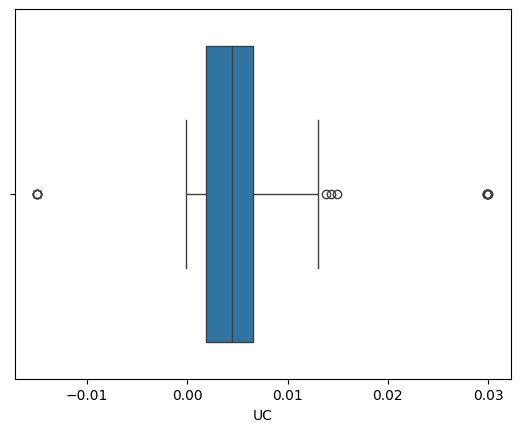

In [37]:
sns.boxplot(x=df['UC'])

In [38]:
outlier_detection(df,'UC')

(-0.005208944500000001, 0.0135828835)

In [39]:
df.loc[df['UC']>0.0135828835,'UC']=0.0135828835
df.loc[df['UC']<-0.005208944500000001,'UC']=-0.005208944500000001

<Axes: xlabel='DL'>

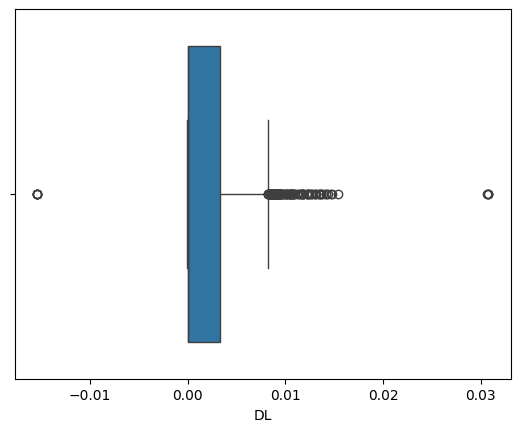

In [40]:
sns.boxplot(x=df['DL'])

In [41]:
outlier_detection(df,'DL')

(-0.004934211, 0.008223685)

In [42]:
def outlier_t(data,colname):   #creating a function to treat outliers directly
  q1=data[colname].quantile(0.25)
  q3=data[colname].quantile(0.75)
  iqr=q3-q1
  Lower_extreme=q1-(1.5*iqr)
  Upper_extreme=q3+(1.5*iqr)
  data.loc[data[colname]>Lower_extreme,colname]=Lower_extreme
  data.loc[data[colname]<Upper_extreme,colname]=Upper_extreme



In [43]:
outlier_t(df,'DL') #using function treating outliers

<Axes: xlabel='DL'>

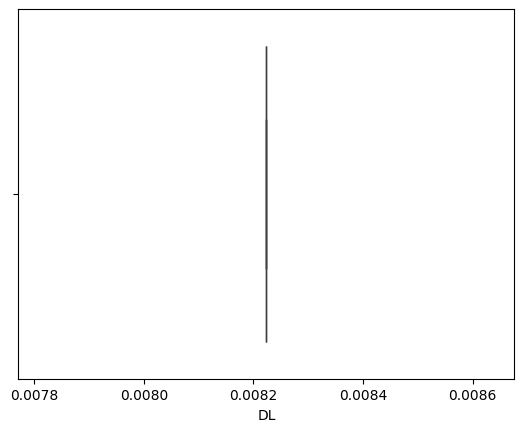

In [44]:
sns.boxplot(x=df['DL'])  #check weather outliers have been treated or not

<Axes: xlabel='DS'>

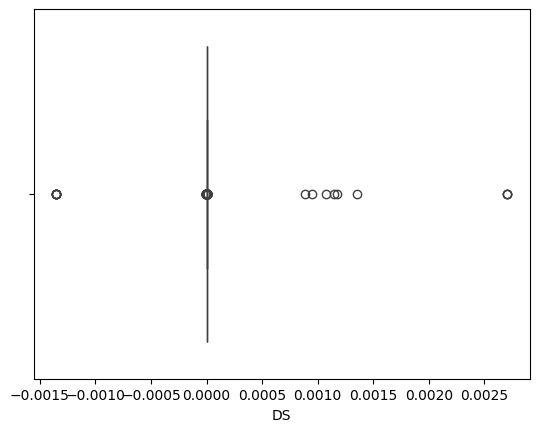

In [45]:
sns.boxplot(x=df['DS'])

In [46]:
outlier_t(df,'DS')

<Axes: xlabel='DS'>

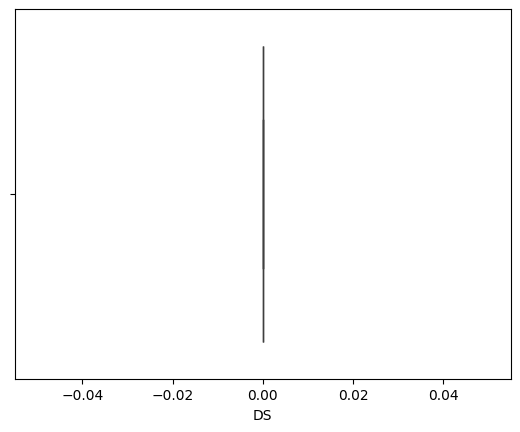

In [47]:
sns.boxplot(x=df['DS']) #outliers have been treated

<Axes: xlabel='DP'>

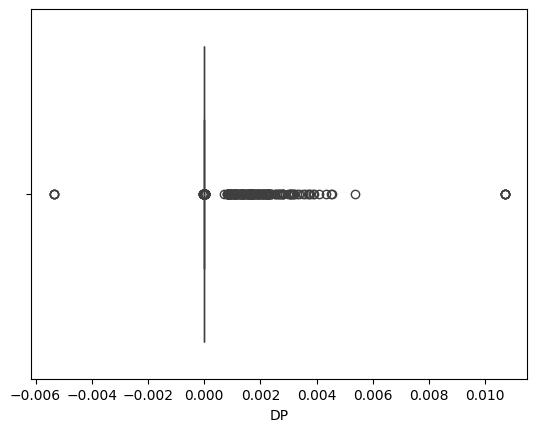

In [48]:
sns.boxplot(x=df['DP'])

In [49]:
outlier_t(df,'DP')

<Axes: xlabel='DP'>

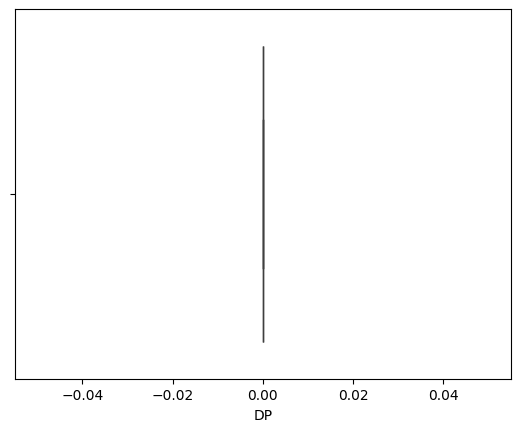

In [50]:
sns.boxplot(x=df['DP']) #checking outliers

In [51]:
outlier_t(df,'MLTV')
outlier_t(df,'ALTV')
outlier_t(df,'ASTV')
outlier_t(df,'MSTV')


<Axes: xlabel='Width'>

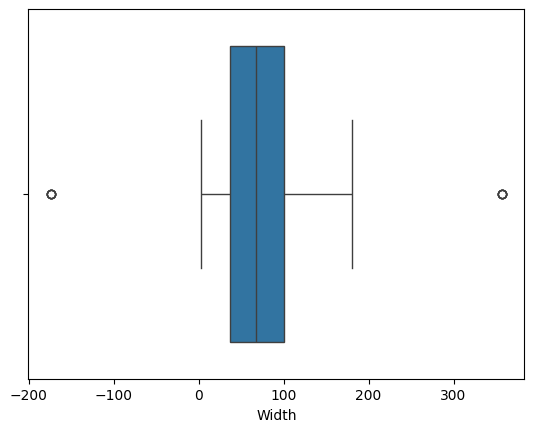

In [52]:
sns.boxplot(x=df['Width'])

In [53]:
outlier_t(df,'Width')
outlier_t(df,'Tendency')
outlier_t(df,'NSP')

In [54]:
#all outliers have been treated completely

In [55]:
# @title SATISTICAL SUMMARY



In [56]:
df.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.0,2105.0,2105.0,2105.0,2105.0,2105.00,2105.0,2105.0,2105.0
mean,133.290377,0.003223,0.001587,0.004358,0.008224,0.0,0.0,104.5,3.2,27.5,20.35,194.5,2.5,1.0
std,9.971882,0.004242,0.002456,0.003008,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
min,105.000000,-0.008475,-0.003435,-0.005209,0.008224,0.0,0.0,104.5,3.2,27.5,20.35,194.5,2.5,1.0
25%,126.000000,0.000000,0.000000,0.001838,0.008224,0.0,0.0,104.5,3.2,27.5,20.35,194.5,2.5,1.0
50%,133.000000,0.001631,0.000000,0.004484,0.008224,0.0,0.0,104.5,3.2,27.5,20.35,194.5,2.5,1.0
75%,140.000000,0.005650,0.002597,0.006536,0.008224,0.0,0.0,104.5,3.2,27.5,20.35,194.5,2.5,1.0
max,160.000000,0.038567,0.006386,0.013583,0.008224,0.0,0.0,104.5,3.2,27.5,20.35,194.5,2.5,1.0


In [57]:
#after treating outliers data has been normally distributed

In [58]:
# @title data visualization


In [59]:
plt.rcParams['figure.figsize'] = (10,5) # RuntimeConfiguration Parameters: size of graph, 10:width, 5:height
plt.rcParams['figure.dpi'] = 300

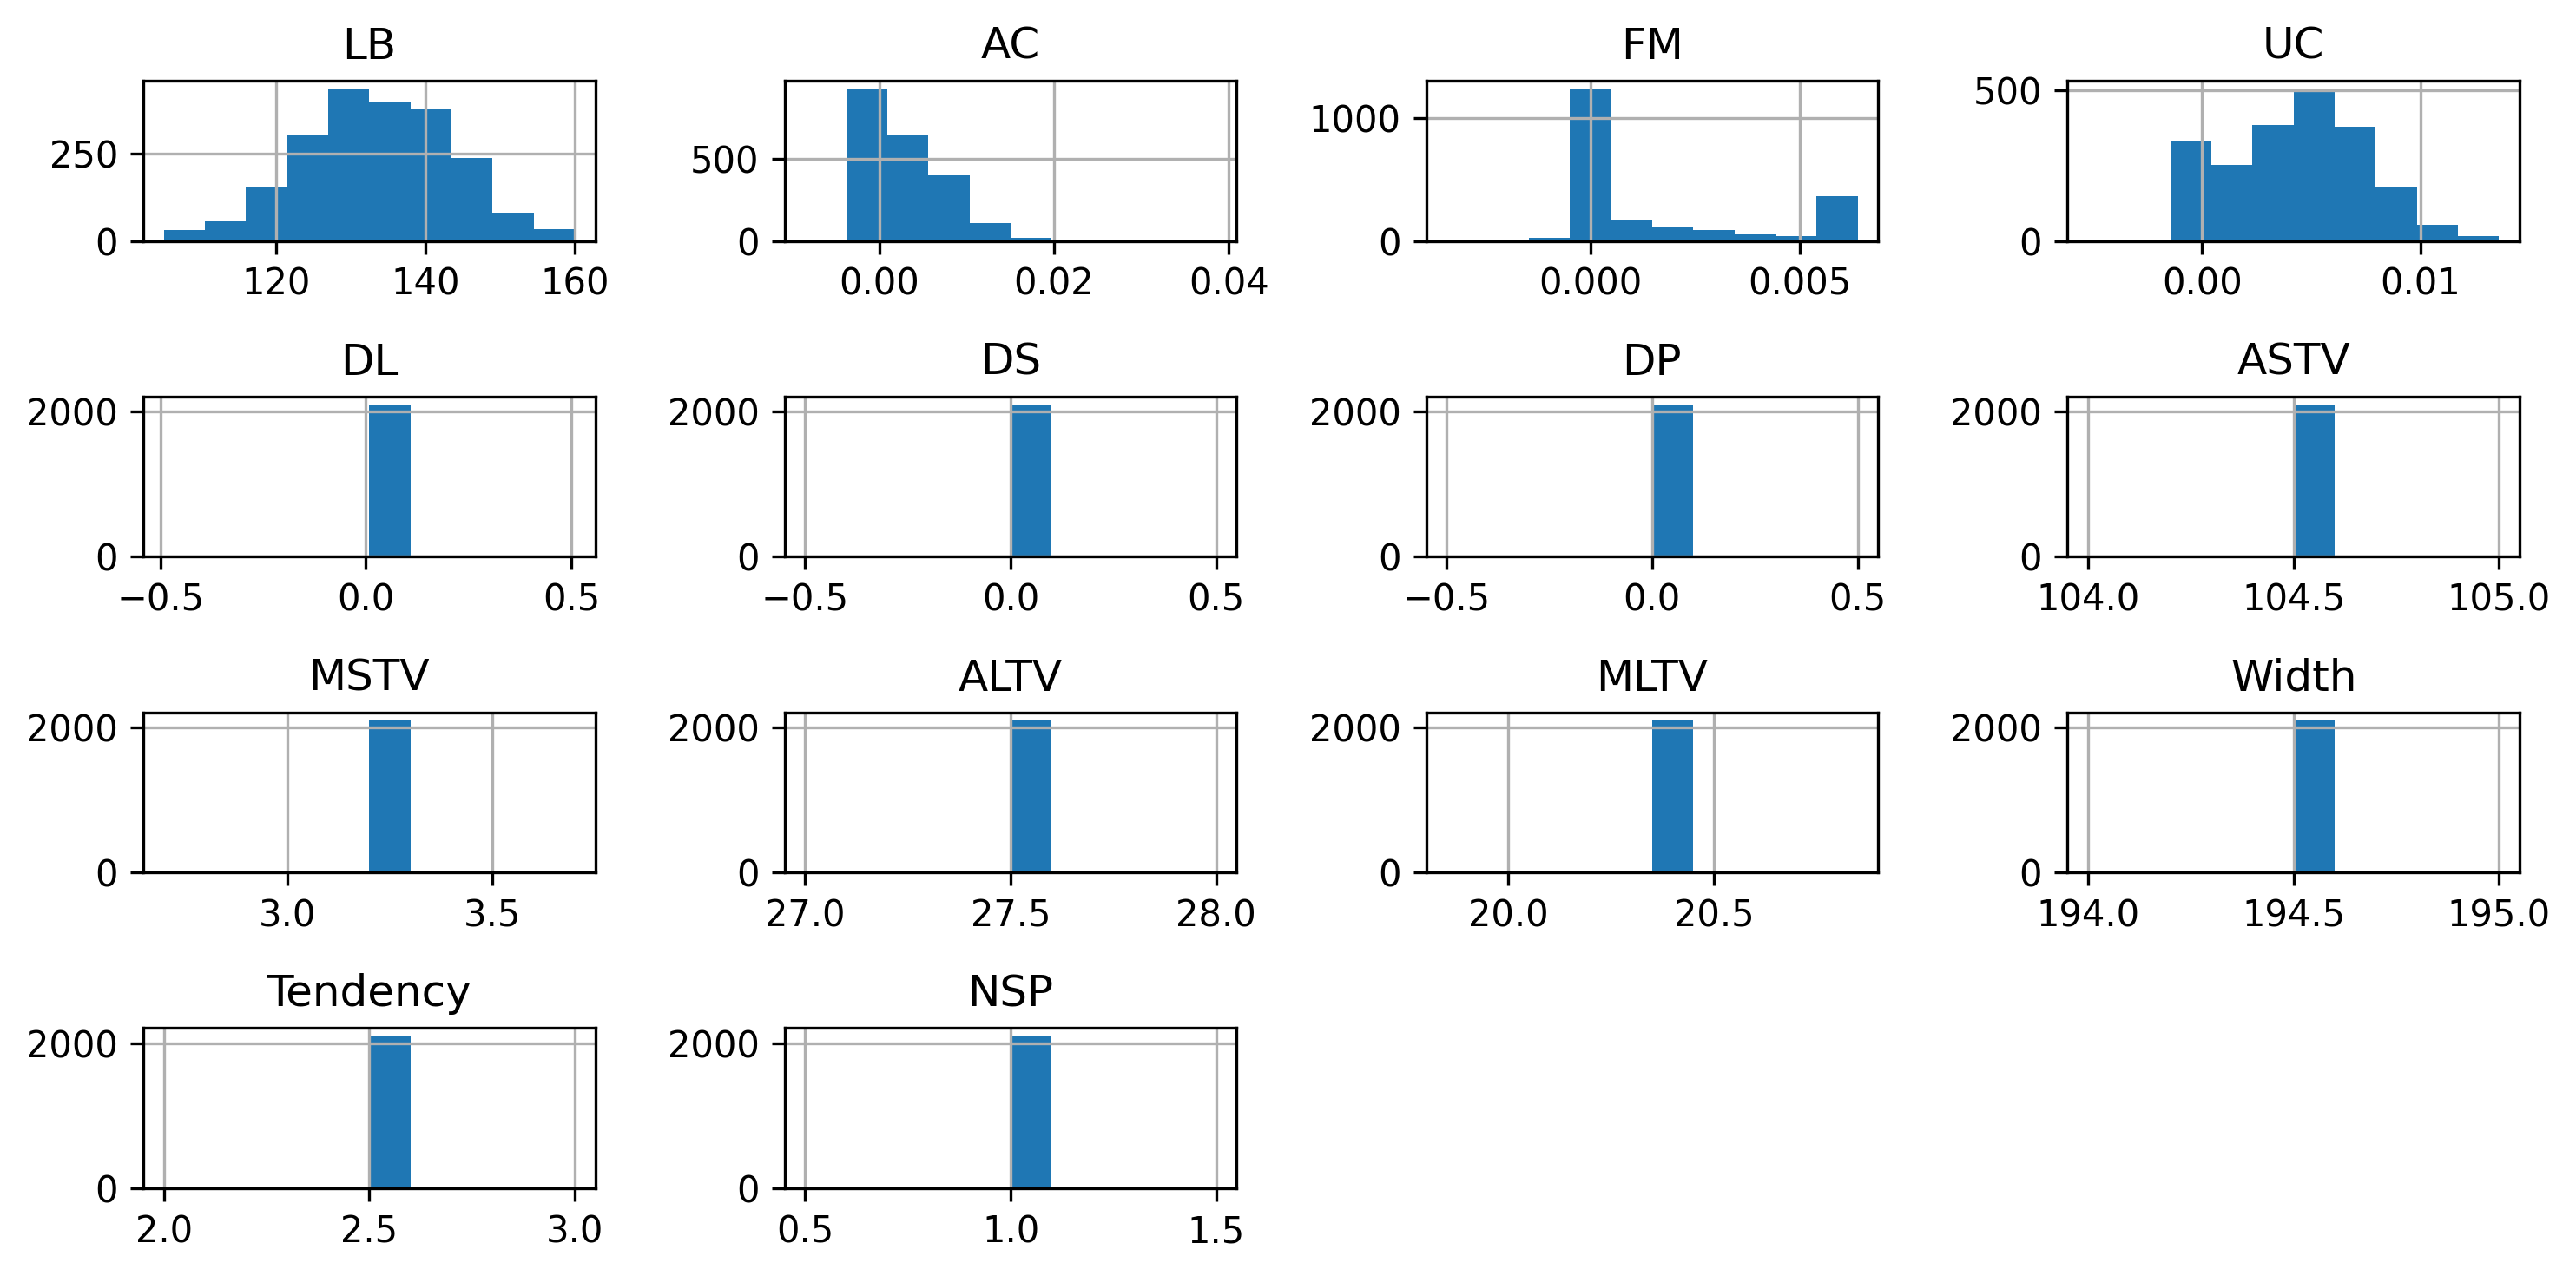

In [60]:
df.hist()
plt.tight_layout()

<Axes: >

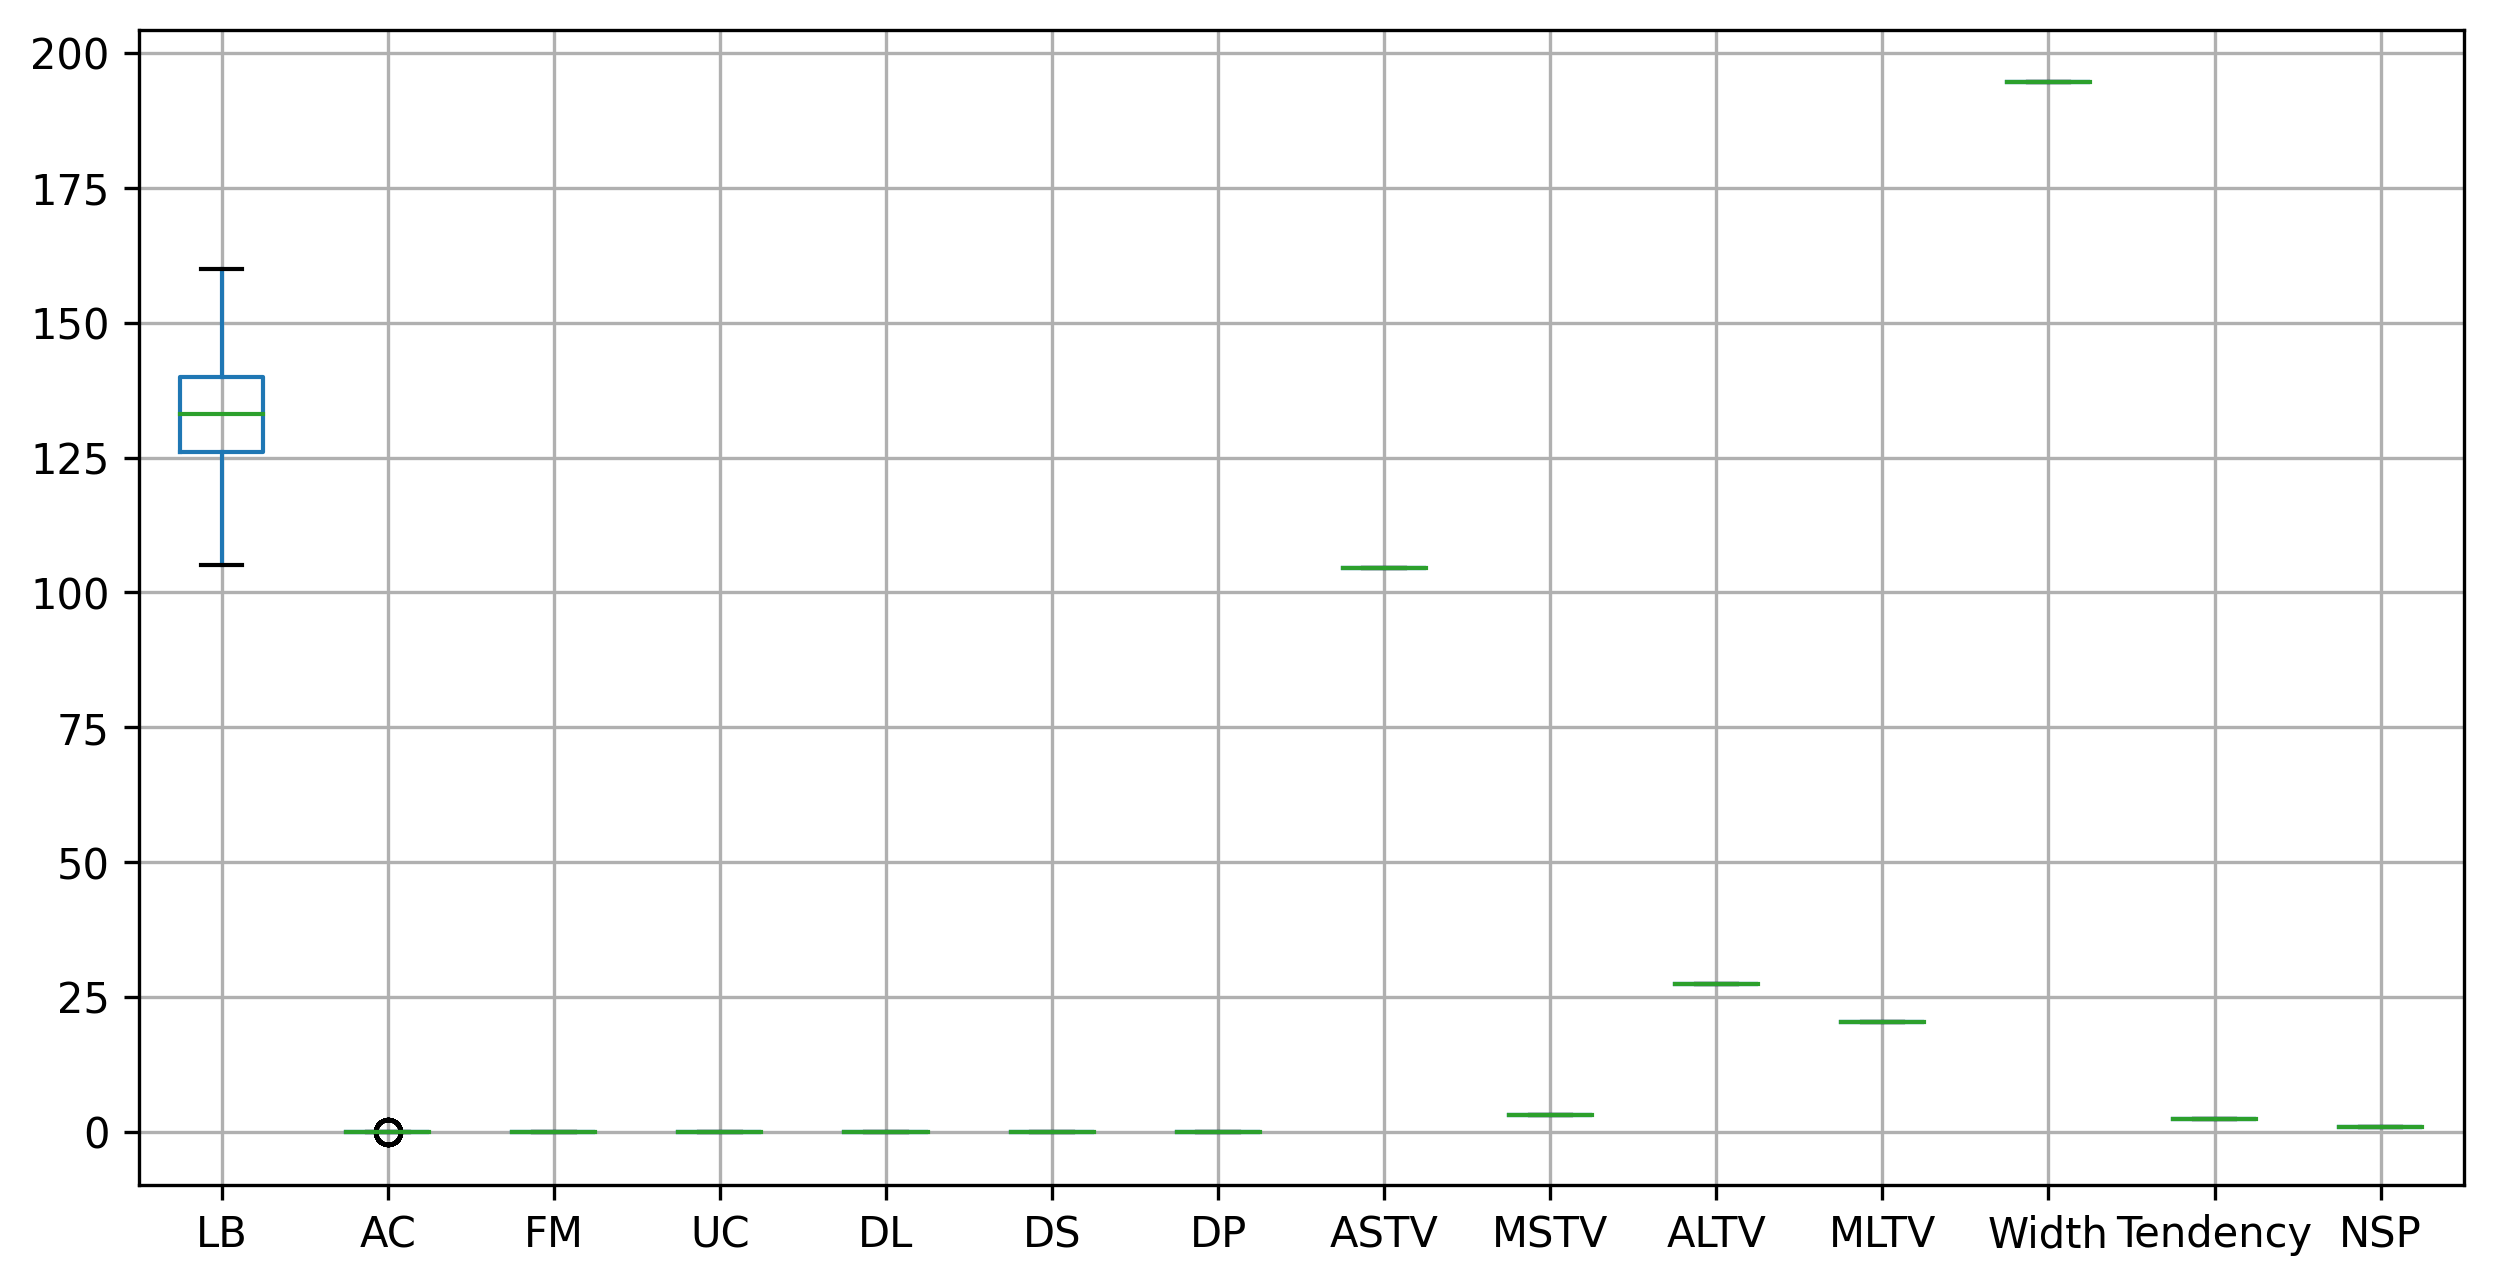

In [61]:
df.boxplot()

In [63]:
sns.pairplot(df)

In [63]:
#summarizing
#we saw many columns had outliers which could have created biased results and would have affected the model accuracy
#identifying relation between columns is essential to consider best columns as feature during model making
#checking distribution of data and scale of data is important to avoid any errors in model
